<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine**
---
**Goal: Get the hyperplane that maximizes the margin between support vectors.** Can be used for both regression and classification tasks, but usually used for classification.

**Q: SVM vs. Logistic Regression**

**A:** The linearn decision boundary in logistic regression is just a consequence of the structure of the regression function. We can have different decision boundaries with different weights near the optimal point. SVM finds the best *margin*: the distance between the separating hyperplanes.

Logistic regression is based on statistical approaches. SVM, on the other hand, is based on geometric properties of data. Instead of assuming a probabilistic model, we try to find a particular optimal separating hyperplane.

The advantage of SVM is the kernel trick. For logistic regression, the advantage would be that we can intrepret the results as probability.

Generally, try using logistic regression first, and if fails use SVM.

---
**Vocabulary**
---
**hyperplane:** in an n-dimensional space, a hyperplane is a flat, n-1 dimensional subset of the space that divides the space into two disconnected parts.

**Support vectors:** data points close to hyperplane and influences the position/orientation of the hyperplane.

**gamma:** parameter with range (0,1). Higher value perfectly fits training datset, resulting in overfitting. Default is 0.1

**Hard Margin SVM:** used when data is linearly separable and we don't want any misclassifications. We aim to find hyperplane with max margin s.t. every training point is correctly classified with margin at least 1. Thus does not handle outliers well.

**Soft Margin SVM:** used when linear boundary is not feasible, or we want to allow some misclassifications for better generality. We can have points with margin less than one. The C parameter in the soft-margin SVM controls the trade-off between maximizing the margin and misclassifications. Large C value means misclassifications are penalized heavily -> model finds hyperplane with small margin & large number of support ectors, sarcrifices generalization ability.

With a dataset with a lot of outliers, a high C value should be used.

Setting high C value = telling SVM that misclassifcations should be penalized heavily -> SVM is inclined to correctly classify points -> less influenced by outliers.

---
**What if the data isn't linearly separable?**
---

1.  Add more dimensions.


*   say we have a dataset that looks like a dart board with different colors as different classes.
*   we can convert this data to a linearly separable data by adding another dimension, the z-axis (radius^2), z = x^2 + y^2. When we plot the data points on the z axis, classes will be clustered around the same radius and thus are linearly separable. Then we project the decision boundary back to original dimensions.
*   Not easy to find correct transformation, lots of calculation


2. Use Kernel trick


*   implicitly maps the data into higher dimensions by calculating the similarity between the data points directly in the original input space
* There are 4 popular kernels:
  * Linear kernel: used when data is linearly separable - linear SVMs and logistic regression generally perform comparably in practice.
  * Polynomial kernel: looks at features of input and determine similarity, and their combinations. Used a lot in NLP.
  * Gaussian kernel (Radial Basis Function Kernel): used when we have no prior knowledge about the data
  * Sigmoid kernel:
* couldn't really understand the math so will come back to this

Thus using the Kernel trick, SVM can efficiently perform not only linear classifications, but non linear classifications too.

---
**Scikit-learn library SVM**
* SVC(): pass kernel value & other paramters - default is kernel = rbf
* Q: LinearSVC vs SVC(kernel = 'linear')?

  A: These two yield different results (metric score, decision boundary) because their approaches differ.
  LinearSVC uses One-vs-All multiclass reduction while SVC uses One-vs-One multiclass reduction.

  **not sure what "linearSVC minimzes squared hinge loss and SVC minimizes regular hinge loss" means though, will revisit**

In [9]:
# let's use the same dataset we used for logistic regression.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [10]:
df = load_breast_cancer(as_frame = True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [31]:
df.shape[0]

569

In [13]:
X = df.drop('target', axis = 1)
y = df['target']

# split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [14]:
# feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Recall from Logistic Regression:
---

In [15]:
# define model
logReg = LogisticRegression()

# fit model
logReg.fit(X_train, y_train)

# predict
y_pred_lr = logReg.predict(X_test)

# confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_lr)
print(cm)

print(metrics.accuracy_score(y_test,y_pred_lr))

[[46  2]
 [ 0 66]]
0.9824561403508771


In [16]:
# define SVM Classifier
svc = svm.SVC()

# train the model
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

In [17]:
# compute accuracy score
print(f"accuracy score with default hyperparameters (rbf kernel and C=10): {metrics.accuracy_score(y_test, y_pred)}")

accuracy score with default hyperparameters (rbf kernel and C=10): 0.9736842105263158


Can we improve this accuracy score? Let's examine the data.

In [18]:
df.describe() #summary statistics

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


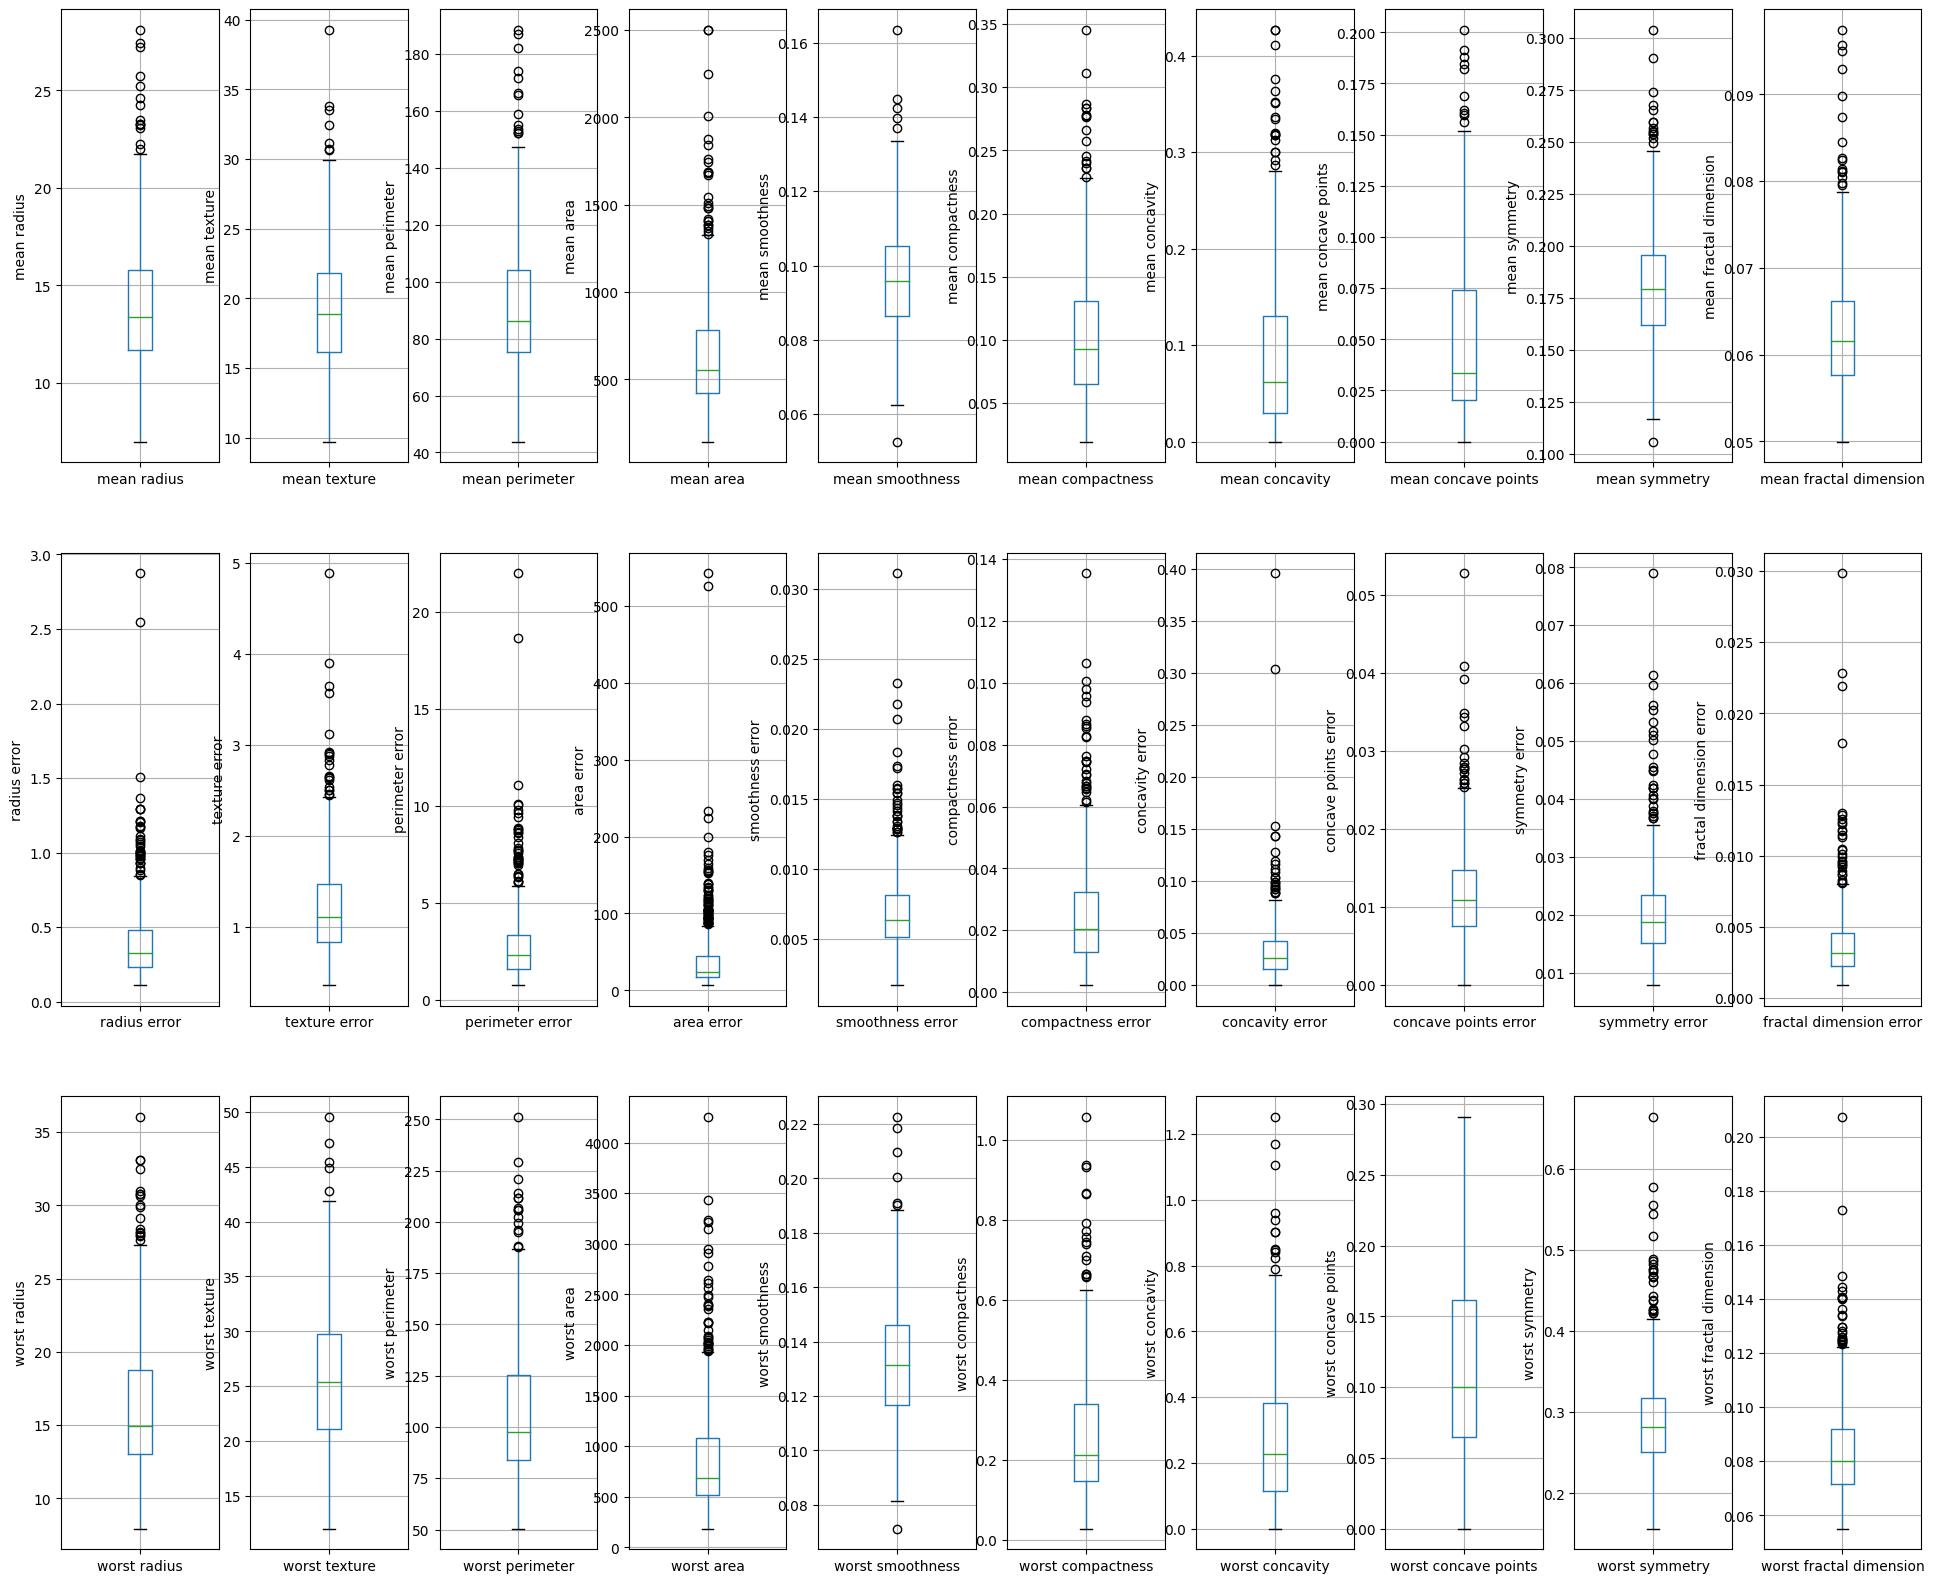

In [19]:
plt.figure(figsize= (24,20))

columns = df.columns.drop('target').tolist()
print(columns)

i = 1
for column in columns:
  plt.subplot(3,10,i)
  fig = df.boxplot(column = column)
  fig.set_title('')
  fig.set_ylabel(column)
  i+=1



As we can see, there are a LOT of outliers! Is there a way we can handle these outliers with SVM?

In [20]:
# use soft-margin clasifier: try running svm with high C
# rbf kernel, C = 100
svc2 = svm.SVC(C = 100)

# train model
svc2.fit(X_train, y_train)

# predict
y_pred2 = svc2.predict(X_test)

print(f"accuracy score with rbf kernel and C = 100: {metrics.accuracy_score(y_test, y_pred2)}")

accuracy score with rbf kernel and C = 100: 0.9736842105263158


**Debugging process**: I changed the C parameter from 10 to 100, but the accuracy score **remained the same**. My hypohthesis was that the outliers were already correctly classified, and thus changing the C parameter won't change much.

To see if this was true, I tried different C values.

In [21]:
# rbf kernel, C = 5
svc3 = svm.SVC(C = 5)

# train model
svc3.fit(X_train, y_train)

# predict
y_pred3 = svc3.predict(X_test)

print(f"accuracy score with rbf kernel and C = 100: {metrics.accuracy_score(y_test, y_pred3)}")

accuracy score with rbf kernel and C = 100: 0.9912280701754386


In [22]:
# rbf kernel, C = 60
svc4 = svm.SVC(C = 60)

# train model
svc4.fit(X_train, y_train)

# predict
y_pred4 = svc4.predict(X_test)

print(f"accuracy score with rbf kernel and C = 100: {metrics.accuracy_score(y_test, y_pred4)}")

accuracy score with rbf kernel and C = 100: 0.9736842105263158


The SVM model showed a higher accuracy score with C = 5 than other C values.
But this was just me guessing -- how would we know what C would produce the best result?

Hyperparameter Optimization: Grid Search
---
**Goal**: finding the right hyperparameter mix for performance

**How**:
1. specify what hyperparmeters need to be tested
2. go through every possible combination of the hyperparameters and evaluate performance of model

**other hyperparameter tuning:**
- random search
- bayesian optimization

GridSearchCV
---
model in sklearn package. With cross-validation, .fit() runs the same loop to find the best parameter combination. Once the best combination is found, .fit() is applied to all data without cross validation to build a new model with the best hyperparameter mix.

Classification Report
---
**precision:**
- accuracy of positive predictions
- TP/(TP+FP)

**Recall:**
- fraction of positives that were correctly identified
-TP/(TP+FN)

**F1 Score:**
- weighted harmonic mean
- should be used to compare classifer models, not global accuracy
- 2 * (recall *precision)/ (recall + precision)


**Support:**
- number of actual occurrences of the class in the dataset
- if imbalanced, we may need stratified sampling or rebalancing

In [23]:
from sklearn.model_selection import GridSearchCV

#define parameter range
param_grid = {'C': [i for i in range(1,101,5)],'kernel': ['rbf'],'gamma': [1,0.1,0.001,0.0001]}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)

#fit grid search model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=1)

In [24]:
print(f"best parameter:{grid.best_params_}")
print(f"best estimator:{grid.best_estimator_}")

best parameter:{'C': 36, 'gamma': 0.001, 'kernel': 'rbf'}
best estimator:SVC(C=36, gamma=0.001)


In [25]:
grid_predictions = grid.predict(X_test)

print(metrics.classification_report(y_test,grid_predictions))
print(metrics.accuracy_score(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


**one could wonder why GridSearchCV returned an accuracy score lower than when we manually set C = 5 above. This could be due to various reasons:
- GridSearchCV finds hyperparameters that generalize well with different randomized portion samples within data.
- GridSearchCV considers other evaluation metrics other than accuracy_score.

In [26]:
# check for overfitting:
print(f"training set score:{grid.score(X_train,y_train)}")
print(f"testing set score:{grid.score(X_test,y_test)}")

training set score:0.9802197802197802
testing set score:0.9736842105263158


Even with the optimized hyperparamters, we can observe that the accuracy score obtained by logistic regression - 0.9824561403508771 - is higher. What could be the reason behind this observation?

Hypothesis: the outliers were already mostly classified correctly, so changing the C value did not drastically improve the accuracy score. Instead, maybe we are overfitting the data by using SVM, a more complex model compared to logistic regression. -> Bad generalization

Thus, let's try using a linear SVM

In [27]:
# define model
linear_svc = svm.SVC(kernel = 'linear', C =1)

# train model
linear_svc.fit(X_train, y_train)

# make predictions
y_pred_linear = linear_svc.predict(X_test)

# confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

# compute accuracy
print(f"accuracy score using linear SVM: {metrics.accuracy_score(y_test, y_pred_linear)}")




[[45  3]
 [ 0 66]]
accuracy score using linear SVM: 0.9824561403508771


In [28]:
# check for overfitting:
print(f"training set score: {linear_svc.score(X_train,y_train)}")
print(f"testing set score: {linear_svc.score(X_test,y_test)}")

training set score: 0.9868131868131869
testing set score: 0.9824561403508771


We can observe that this SVM with a linear kernel generalizes better than the SVM Classifers above with more complex kernels. This observation supports our hypothesis.

Null Accuracy
---
def: accuracy that could be acheived by always predicting the most frequent class. We should compare the model accuracy with null accuracy.

In [29]:
y_test.value_counts()

1    66
0    48
Name: target, dtype: int64

In [30]:
# check null accuracy score
null_accuracy = (66/(66+48))
print(f"null accuracy score: {null_accuracy}")

null accuracy score: 0.5789473684210527


Summary
---
Through this data analysis project, I have gained the skills to approach a dataset with different tools such as logistic regression and svm, as well as how to utilize such tools depending on the characteristics of the data instead of trying to find a set answer.